In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn

df=pd.read_csv('/content/income dataset.csv')

In [69]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [71]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='workclass'>

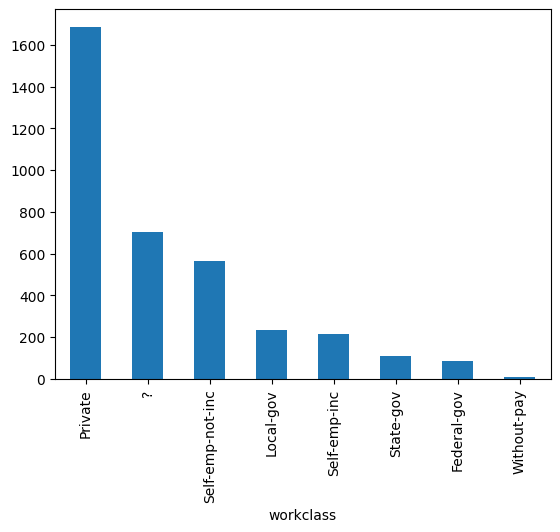

In [72]:
df[df['age']>60]['workclass'].value_counts().plot(kind='bar')

<Axes: xlabel='education'>

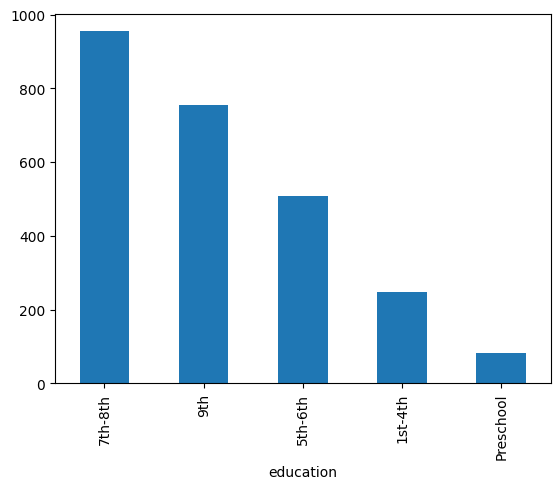

In [73]:
df[df['educational-num']<=5]['education'].value_counts().plot(kind='bar')

In [74]:
for i in df.index:
  if df.loc[i,'educational-num']<=5:
    df.loc[i,'education']='dropout'

In [75]:
df['good investor']=df['capital-gain']>1
df['bad investor']=df['capital-loss']>1

In [76]:
df[df['hours-per-week']==df['hours-per-week'].max()]['occupation'].value_counts().sum()/len(df)

np.float64(0.0028049629417304777)

workclass


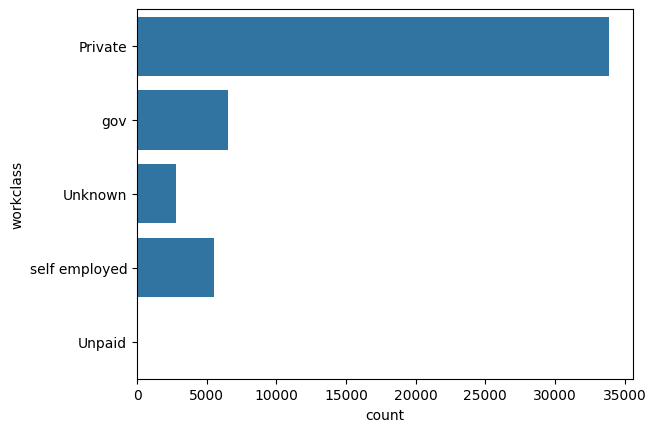

education


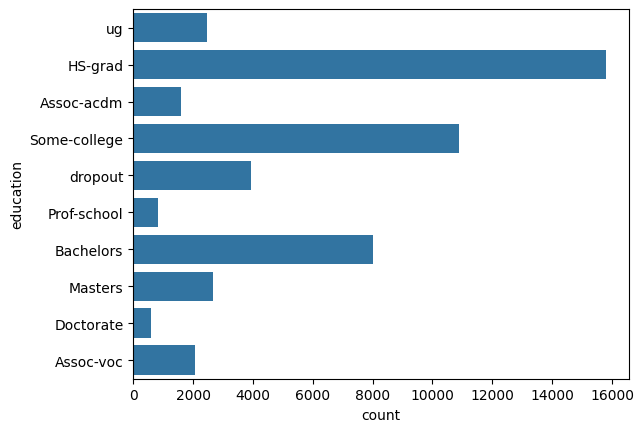

marital-status


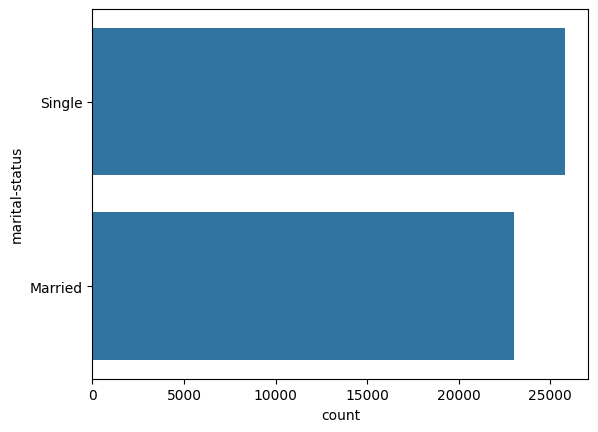

occupation


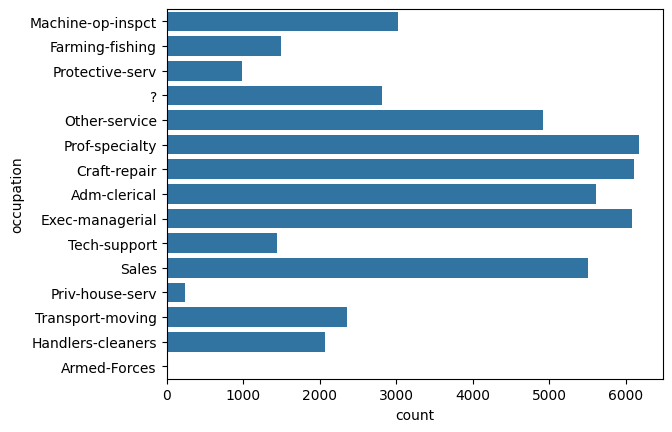

relationship


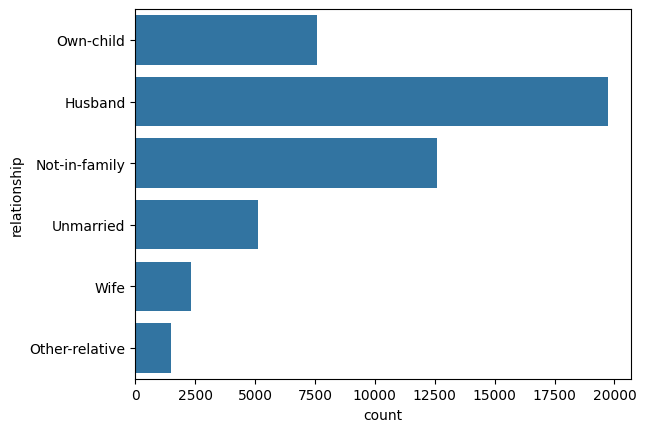

race


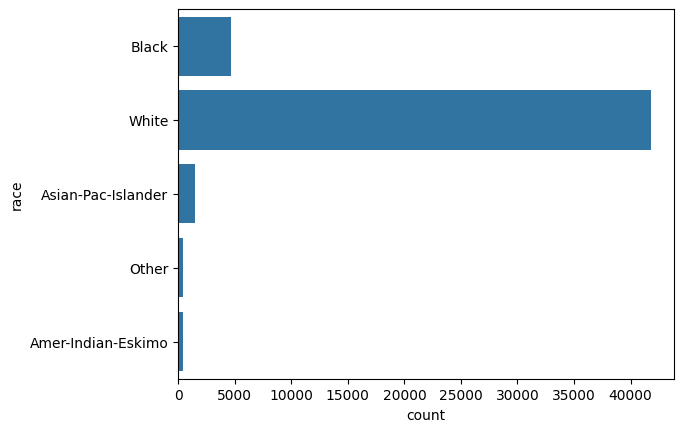

gender


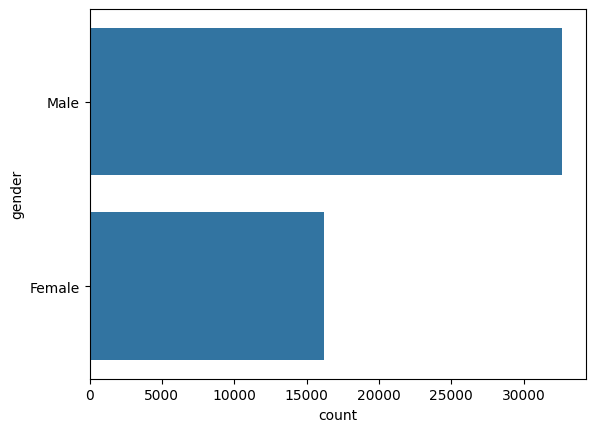

native-country


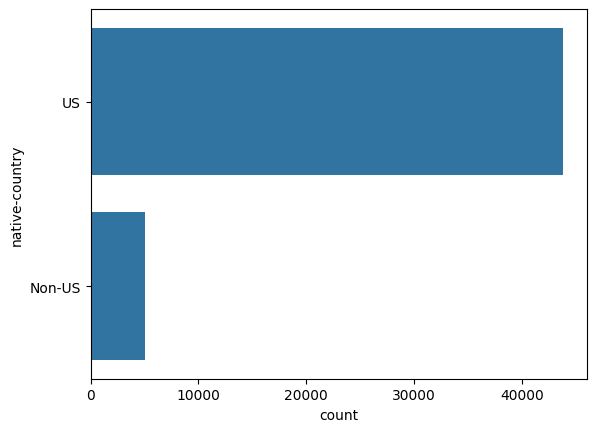

income


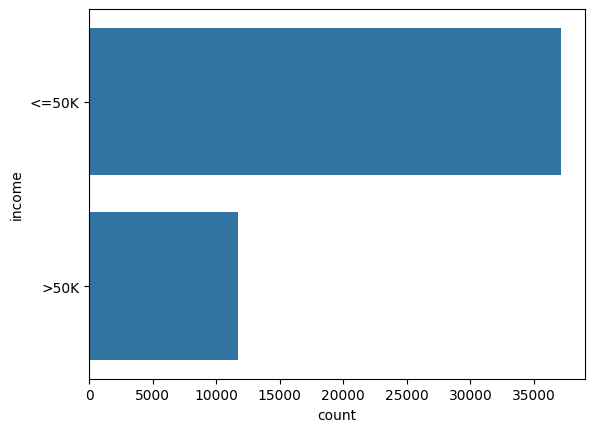

In [89]:
for col_name in df.select_dtypes('object').columns:
  print(col_name)
  sns.countplot(df[col_name])
  plt.show()

In [78]:
for i in df.index:
  if 'gov' in df.loc[i,'workclass'].lower():
    df.loc[i,'workclass']='gov'

In [79]:
df.workclass.unique()

array(['Private', 'gov', '?', 'Self-emp-not-inc', 'Self-emp-inc',
       'Without-pay', 'Never-worked'], dtype=object)

In [80]:
df['workclass']=df['workclass'].str.replace('Without-pay','Unpaid').str.replace('Never-worked','Unpaid')

In [81]:
for i in df.index:
  if 'self' in df.loc[i,'workclass'].lower():
    df.loc[i,'workclass']='self employed'

In [82]:
df['workclass']=df['workclass'].str.replace('?','Unknown')

In [83]:
df['education']=df['education'].str.replace('10th','dropout').str.replace('11th','ug').str.replace('12th','ug')

In [84]:
df['marital-status']=df['marital-status'].str.replace('Married-civ-spouse','Married').str.replace('Married-spouse-absent','Married').str.replace('Married-AF-spouse','Married').str.replace('Divorced','Single').str.replace('Separated','Single').str.replace('Widowed','Single')

In [85]:
df['marital-status']=df['marital-status'].str.replace('Never-married','Single')

In [86]:
df['marital-status'].unique()

array(['Single', 'Married'], dtype=object)

In [87]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'good investor', 'bad investor'],
      dtype='object')

In [88]:
for i in df.index:
  if 'united-states' in df.loc[i,'native-country'].lower():
    df.loc[i,'native-country']='US'
  else:
    df.loc[i,'native-country']='Non-US'


In [90]:
df.drop(['relationship','fnlwgt'],axis=1,inplace=True)

In [ ]:
df['workclass'][df['occupation']=='?'].value_counts()

In [ ]:
df['workclass'][df['occupation']=='Other-service'].value_counts()

In [97]:
df=df.replace('?','Unknown')

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in df.select_dtypes('object').columns:
  df[col_name]=le.fit_transform(df[col_name])


In [101]:
X=df.drop('income',axis=1)
y=df['income']

In [ ]:
X['educational-num'][X['educational-num']<5]=5

In [ ]:
sns.boxplot(X['educational-num'])

In [ ]:
pip install imblearn

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
sm=SMOTE() #Synthetic Minority Over-sampling Technique

In [110]:
X,y=sm.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100, stratify=y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))


In [ ]:
#ols coding
#regularization
#notes like interview answers
#nlp (web extraction)